In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [399]:
def data_scaling(A):
    m, n = np.shape(A)
    
    x_bar = np.mean(A, axis = 0)
    sigma = np.std(A, ddof = 1, axis = 0)
    for i in range(m):
        for j in range(n):
            A[i][j] = (A[i][j] - x_bar[j]) / sigma[j]
    
    return A

In [400]:
def data_centering(A):
    m, n = np.shape(A) # rows and columns of matrix A
    t = np.mean(A, axis = 0) # mean of each column in matrix A
    
    # substract the mean of each column
    T = np.zeros(shape = (m, n), dtype = np.float64)
    for i in range(m):
        for j in range(n):
            T[i][j] = float(A[i][j]-t[j])
    
    return T

In [401]:
def from_eig_to_sing(eig_val, eig_vec):
    li = []
    for i in range(len(eig_val)):
        eig_val[i] = np.sqrt(eig_val[i])
        if eig_val[i] < 10**(-14):
            li.append(i)
            
    sing_val = np.delete(eig_val, li)
    sing_vec = np.delete(eig_vec, li, 0)
    
    sort_idx = np.flip(np.argsort(sing_val))
    sing_val = sing_val[sort_idx]
    sing_vec = sing_vec[:, sort_idx]

    return sing_val, sing_vec

In [402]:
def pca(A):
    A = data_centering(A)
    
    gram_matrix = A.T @ A
    eig_val, eig_vec = np.linalg.eig(gram_matrix)
    
    sing_val, sing_vec = from_eig_to_sing(eig_val, eig_vec)

    nu = 1 / (len(A) - 1)
    for i in range(len(sing_val)):
        sing_val[i] = np.sqrt(nu) * sing_val[i]

    return sing_vec.T, sing_val

In [403]:
def plotParagraph4(std):
    fig, ax = plt.subplots(figsize = (16, 6))
    
    ax.plot(1 + np.arange(len(std)), std, 'o--', color = 'purple')
    
    ax.set_xlabel(r'$i$', fontsize = 16)
    ax.set_ylabel(r'$\sqrt{\nu} \sigma_i$', fontsize = 16)
    ax.grid()
    
    plt.savefig("std.pdf")

In [404]:
def plotParagraph5(A, principal_components, diagnosis):
    principal_components = principal_components[:2] #две главные компоненты
 
    proj = A @ principal_components.T
    fig, ax = plt.subplots(figsize=(16, 6))

    for i in range(len(diagnosis)):
        if diagnosis[i] == 'B':
            green = ax.scatter(proj[i][0], proj[i][1], color='lime')
        else:
            red = ax.scatter(proj[i][0], proj[i][1], color='red')

    ax.set_xlabel('Проекция на 1 главную компоненту', fontsize=16)
    ax.set_ylabel('Проекция на 2 главную компоненту', fontsize=16)
    plt.title('Обследование на предмет наличия рака молочной железы', fontsize=16)
    ax.legend([green, red], ['Доброкачественная', 'Злокачественная'], loc='upper left', fontsize=15)
    ax.grid()
    plt.savefig("cancer.pdf")

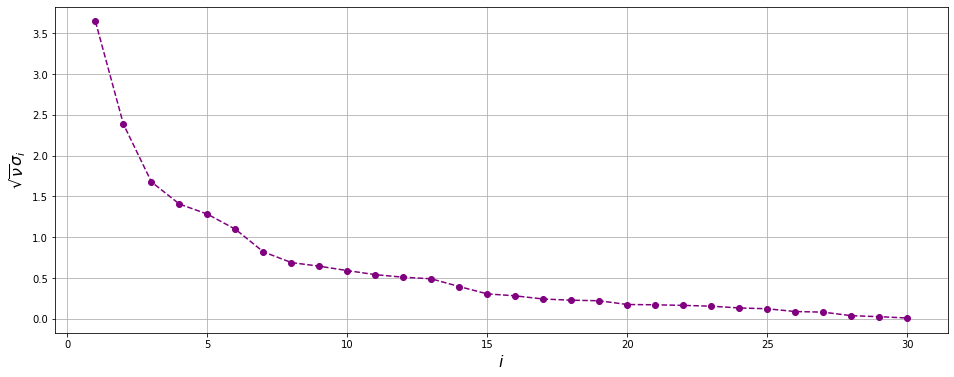

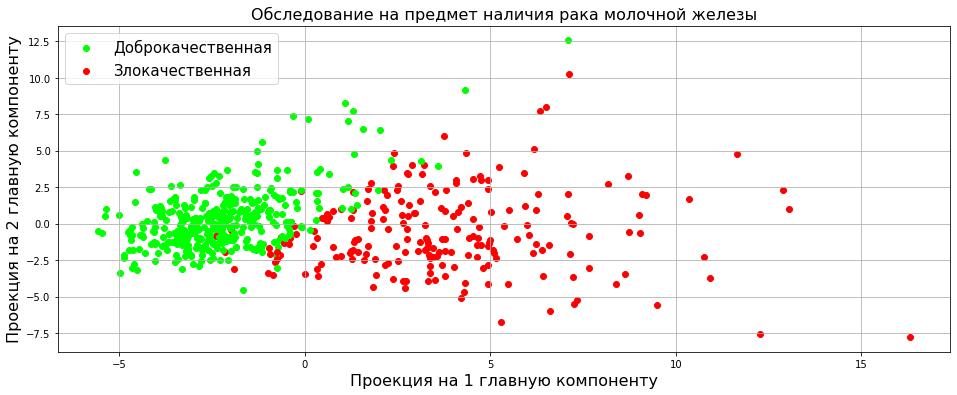

In [405]:
if __name__ == '__main__':
    df = pd.read_csv('wdbc.data', names = [i for i in range(32)])
    data = np.array(df)
    
    diagnosis = data[:, 1]
    A = np.array(data[:, 2:32], dtype=np.float64)
    
    A = data_scaling(A)
    principal_components, std = pca(A)
    
    plotParagraph4(std)
    
    plotParagraph5(A, principal_components, diagnosis)
    